**DATA CLEANING**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [37]:
df.shape

(11251, 15)

In [38]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [40]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [41]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [42]:
df.shape

(11251, 13)

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(11239, 13)

In [45]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [46]:
df['Amount']=df['Amount'].astype('int')

In [47]:
df['Amount'].dtypes

dtype('int32')

In [48]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [49]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**EDA**

In [50]:
df. columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

*Gender*

C:\Users\USER\AppData\Local\Temp\ipykernel_13280\3336959612.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Gender',data=df,palette='Set2')


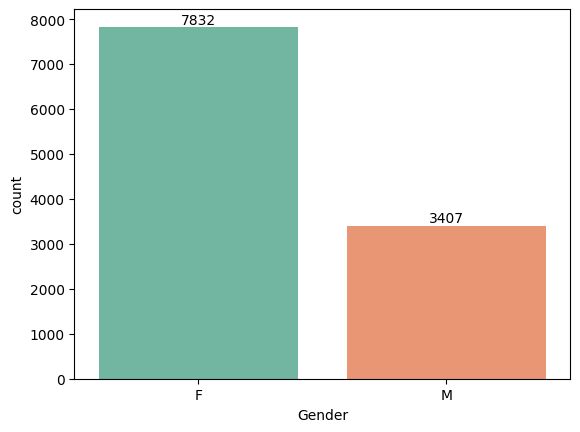

In [51]:
ax=sns.countplot(x='Gender',data=df,palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

In [53]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


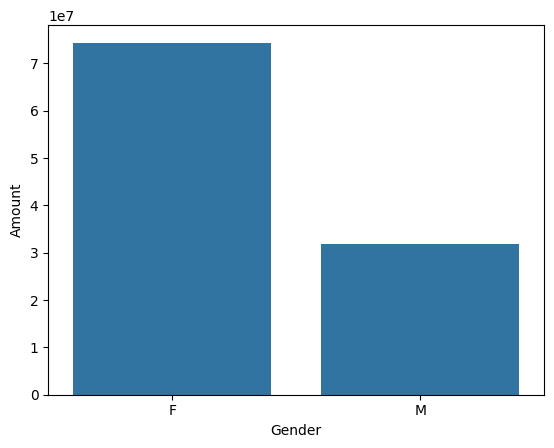

In [57]:
sales_gen= df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ay=sns.barplot(x='Gender',y='Amount',data=sales_gen)
# for bars in ay.containers:
#     ay.bar_label(bars)

From the above graph we can see that most buyers are females and the purchasing power of females are greater than men.

*Age*

In [60]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

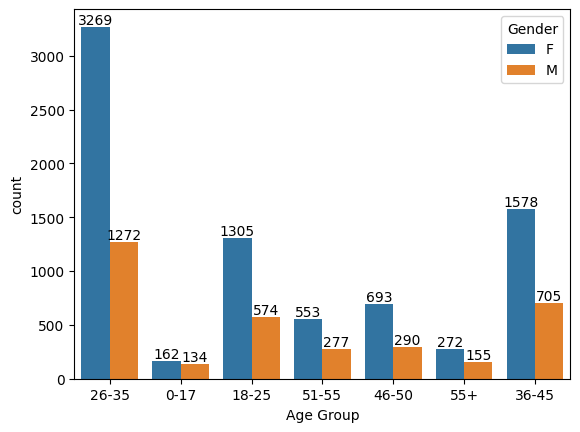

In [62]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\USER\AppData\Local\Temp\ipykernel_13280\1416134325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group',y='Amount',data=sales_age,palette="Set2")


<Axes: xlabel='Age Group', ylabel='Amount'>

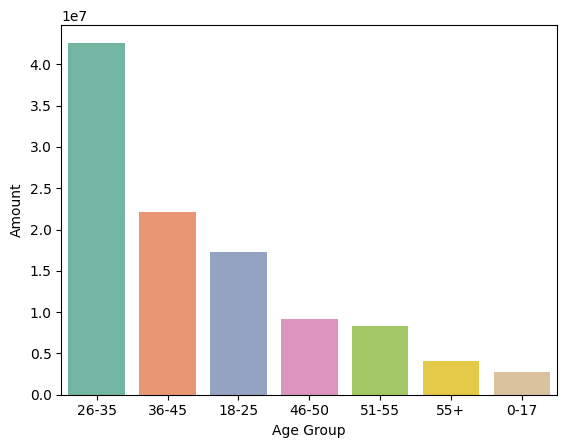

In [66]:
#Total amount vs Age Group
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age,palette="Set2")

From the above graph we can deduce that most buyers are females of the age group 26-35

*State*

C:\Users\USER\AppData\Local\Temp\ipykernel_13280\48623031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='State',y='Orders',palette="Set2")


<Axes: xlabel='State', ylabel='Orders'>

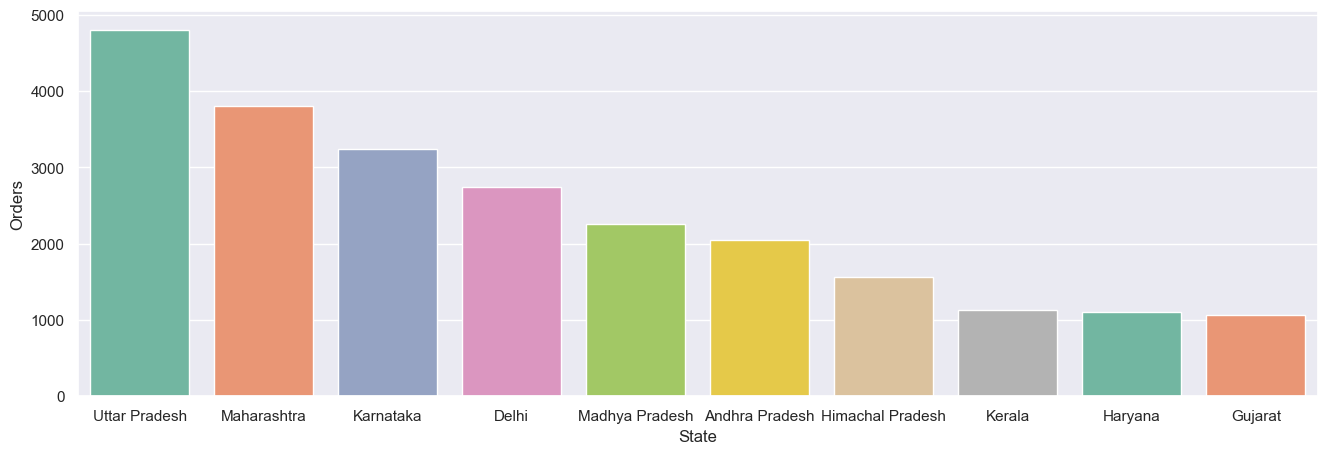

In [74]:
#Total number of orders from the top 10 states
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state,x='State',y='Orders',palette="Set2")

C:\Users\USER\AppData\Local\Temp\ipykernel_13280\852829964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='State',y='Amount',palette="Set2")


<Axes: xlabel='State', ylabel='Amount'>

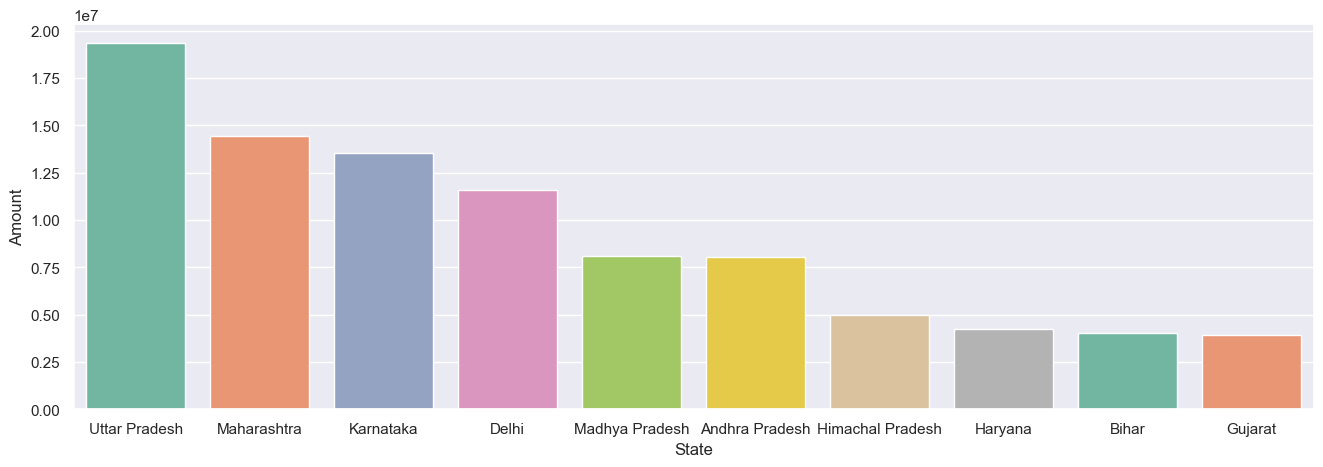

In [79]:
#Total amount of sales from top from the top 10 states
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state,x='State',y='Amount',palette="Set2")

**We can see that most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively but total sales revenue is from Uttar Pradesh, Karnataka and then Maharasthra**

*Marital Status*

C:\Users\USER\AppData\Local\Temp\ipykernel_13280\943264863.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Marital_Status',palette="Set2")


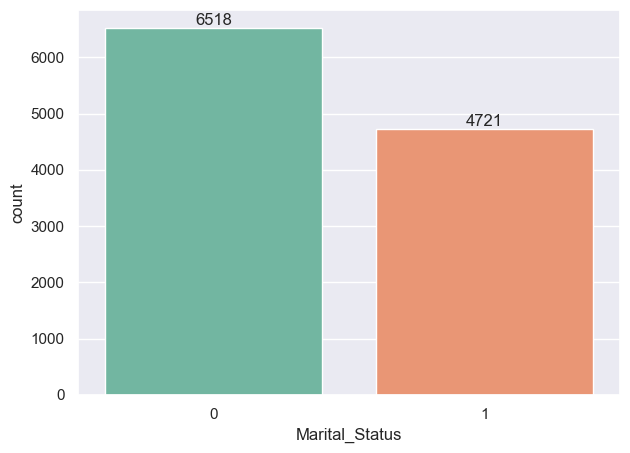

In [84]:
ax=sns.countplot(data=df,x='Marital_Status',palette="Set2")
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

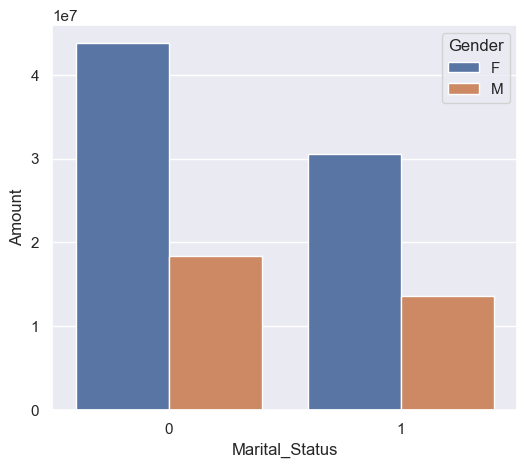

In [85]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')    

The above graphs show that most of the buyers are married women also they have a high purchasing power

*Occupation*

C:\Users\USER\AppData\Local\Temp\ipykernel_13280\4277967175.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Occupation',palette="Set2")


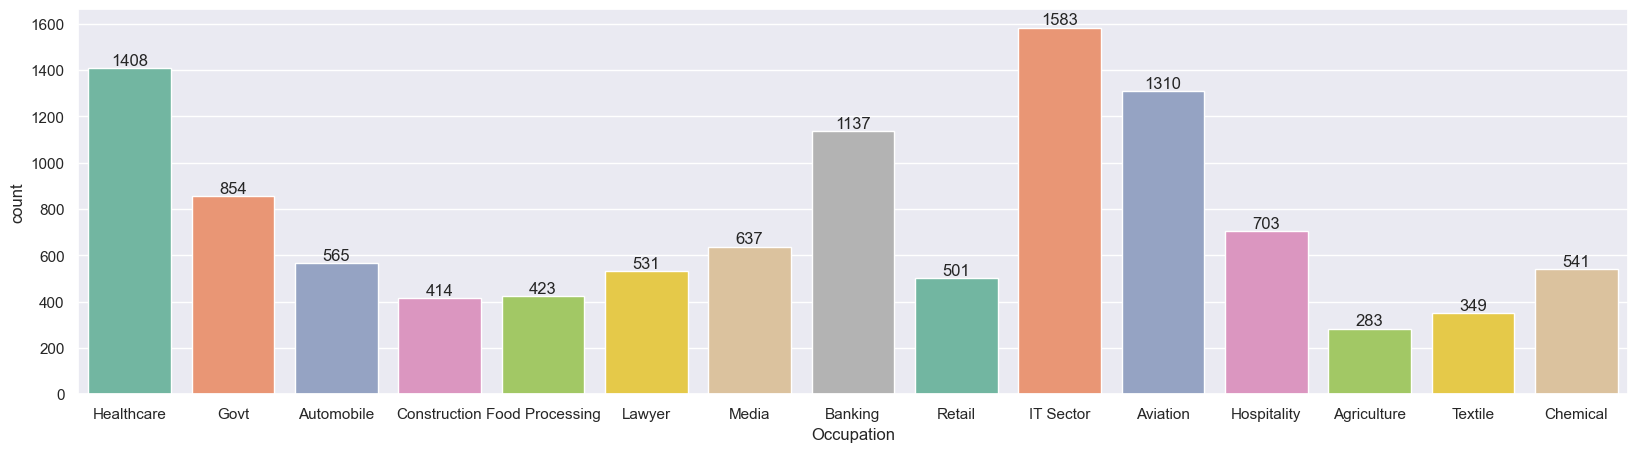

In [90]:
ax=sns.countplot(data=df,x='Occupation',palette="Set2")
sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\USER\AppData\Local\Temp\ipykernel_13280\2851181483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='Occupation',y='Amount',palette="Set2")


<Axes: xlabel='Occupation', ylabel='Amount'>

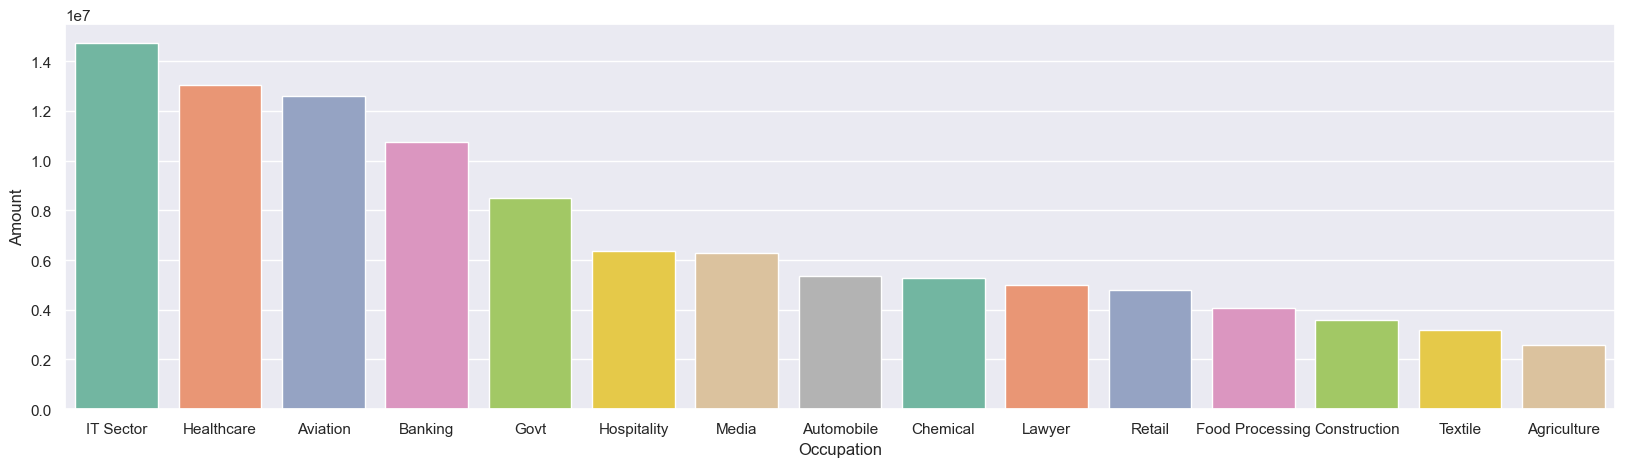

In [91]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount',palette="Set2")

We deduce that most buyers are working in IT, Healthcare and Aviation sector

*Product Category*

C:\Users\USER\AppData\Local\Temp\ipykernel_13280\1990975415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='Product_Category',palette="Set2")


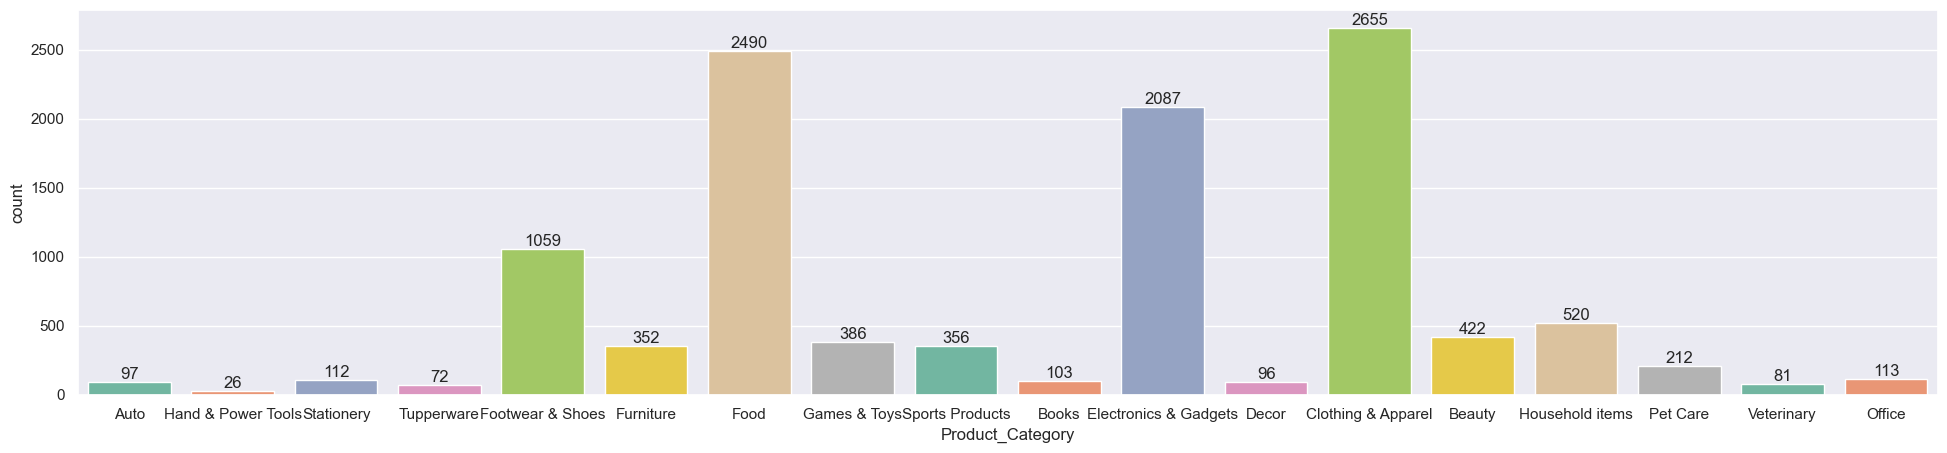

In [98]:
sns.set(rc={'figure.figsize':(24,5)})
ax=sns.countplot(data=df, x='Product_Category',palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\USER\AppData\Local\Temp\ipykernel_13280\310037650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='Product_Category',y='Amount',palette="Set2")


<Axes: xlabel='Product_Category', ylabel='Amount'>

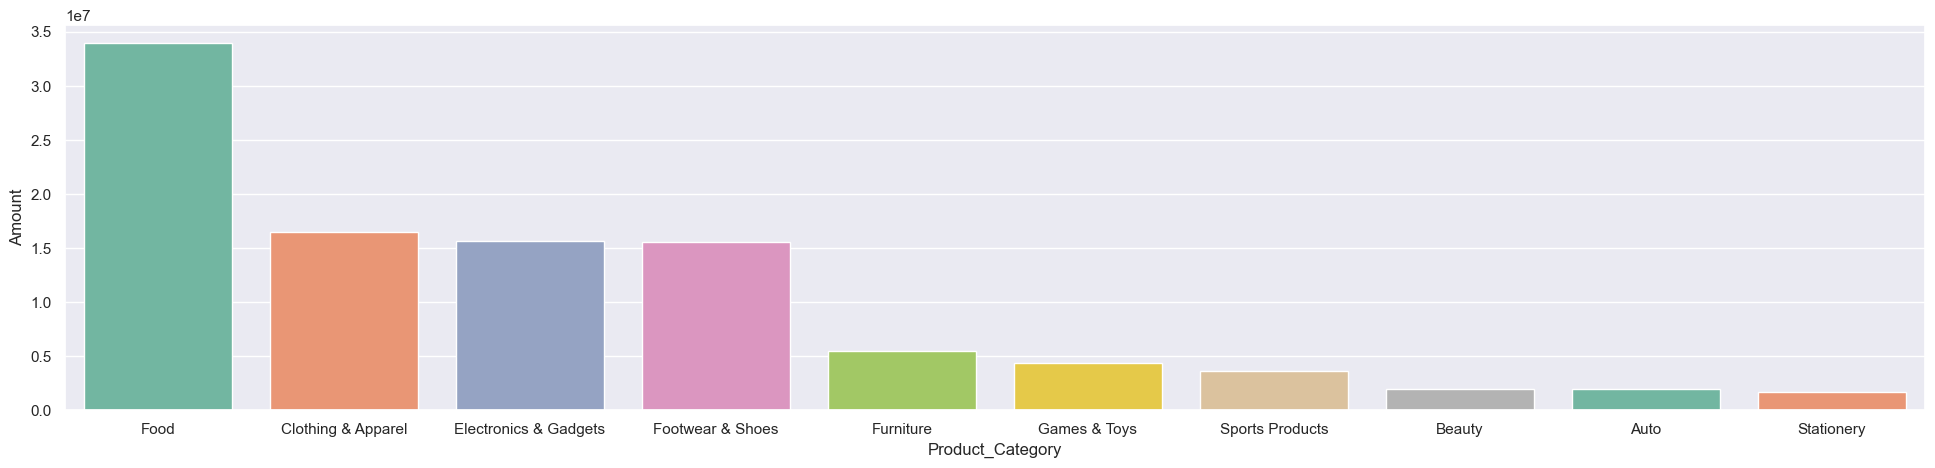

In [104]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount',palette="Set2")

Most sold product categories are food, clothing and electronics

<Axes: xlabel='Product_ID', ylabel='Orders'>

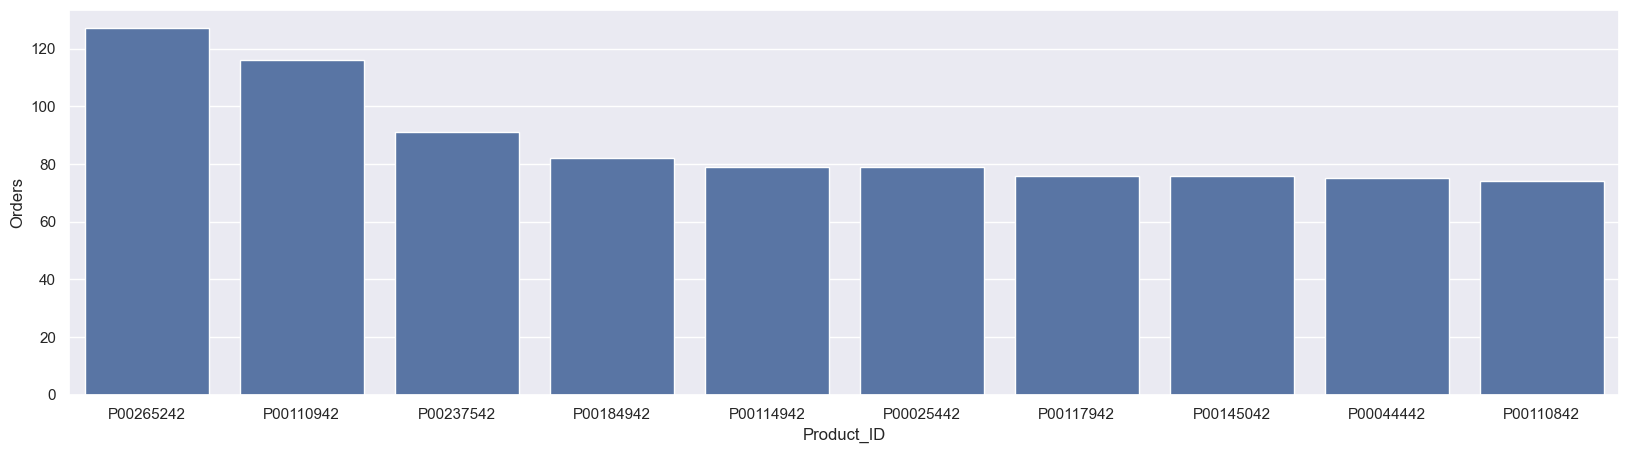

In [105]:
sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')

**Conclusion**
Married women of the age group 26-35 yrs from Uttar Pradesh, Maharashtra and Karnataka working in IT, healthcare and aviation are more likely to buy products from food, clothing and electronics category.